# Определение перспективного тарифа для телеком-компании

# Содержание

- Шаг 1. Загрузим данные и подготовим их к анализу
- Шаг 2. Подготовка данных
- Шаг 3. Проанализируем данные
- Шаг 4. Проверим гипотезы
- Шаг 5. Общий вывод

# Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
df_list = [calls,internet,messages,tariffs,users]
for df in df_list:
    print('Первые 5 строк')
    print('-'*50)
    display(df.head())
    print('-'*50)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('-'*50)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*50)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*50)
    print('Наличие пропусков')
    print('-'*50)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*50)
    display(df.describe())

Первые 5 строк
--------------------------------------------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (202607, 4)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
id           0
call_date    0
duration     0
user_id      0
dtype: int64
Стат данные
--------------------------------------------------


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Первые 5 строк
--------------------------------------------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (149396, 5)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
Стат данные
--------------------------

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Первые 5 строк
--------------------------------------------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (123036, 3)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
id              0
message_date    0
user_id         0
dtype: int64
Стат данные
--------------------------------------------------


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Первые 5 строк
--------------------------------------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (2, 8)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
------------

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


Первые 5 строк
--------------------------------------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (500, 8)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
--------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------
Наличие пропусков
--------------------------------------------------
user_id         0
age             0
churn_date    462
city           

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


## 1.1 Calls

In [4]:
print('Количетсво звонком у которых - длительность звонка менее 1 минуты: {}'.format(len(calls[calls.duration < 1])))

Количетсво звонком у которых - длительность звонка менее 1 минуты: 47927


- Пропусков нет, которые нужно заменить.
    
    
- call_date дату звонков нужно привести к DateTime.
    
    
- 47927 звонков было совершено меньше минуты.Применим метод np.ceil для приведения ВСЕХ значений к большему числу и после поменяем тип на INT

## 1.2 Internet

In [5]:
print('Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб и больше 0: {}'.format(len(internet.query('mb_used < 1 and mb_used > 0'))))

print('Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб: {}'.format(len(internet.query('mb_used < 1 '))))

Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб и больше 0: 101
Количество сессий объема потраченного за сессию интернет-трафика менее 1 Мб: 19699


- Пропусков нет, которые нужно заменить.
    
    
- Объём потраченного за сессию интернет-трафика указан в мегабайтах, в то время, как в тарифе в гигабайтах. Таким образом, если пользователь израсходует объем трафика, предоставленный тарифным планом, для анализа нам потребуется привести дополнительный объем трафика к гигабайтам, чтобы рассчитать стоимость;
    
    
- session_date дату интернет-сессии нужно привести к DateTime.
    
    
- 19699 сесия имеют объём потраченного за сессию интернет-трафика менее 1 Мб. Если сессия зарегестрирована значит трафик был, правда странно если он равен 0. Но исходя из условий - Наш оператор округляет вверх значения мегабайтов. Применим метод np.ceil для приведения ВСЕХ значений к большему числу, а так же все нули заменим на 1 и после поменяем тип на INT

## 1.3 Messages

- message_date дату сообщения нужно привести к DateTime.

## 1.4 Tariffs

- Пропусков нет, которые нужно заменить.


- Название столбца было измененно в связи с тем что имя такого столбца есть в users_df. Для merge

## 1.5 Users

- Нам доступны данные 500 пользователей, 462 из которых все еще пользуются тарифом:

-  351 – Смарт
-  149 – Ультра
    
- Пропусков, которые нужно заполнить, и дубликатов в данных нет;

- Следующие признаки необходимо привести к типу DateTime:

- reg_date дата подключения тарифа;
- churn_date дата прекращения пользования тарифом.

# Шаг 2. Подготовка данных

In [6]:
dtformat = '%Y-%m-%d'

def to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], format=dtformat)

# Даты
to_datetime(users, ['reg_date', 'churn_date'])
to_datetime(calls, ['call_date'])
to_datetime(messages, ['message_date'])
to_datetime(internet, ['session_date'])

# Минуты и мегабайты
calls['duration'] = calls['duration'].astype('int64')
internet['mb_used'] = internet['mb_used'].astype('int64')

In [7]:
# Звонки
calls['duration'] = calls['duration'].apply(np.ceil)
calls.loc[calls['duration'] == 0 ,'duration'] = 1

# Интернет-сессии
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.loc[internet['mb_used'] == 0 ,'mb_used'] = 1

## Сбор статистики

Создадим столбцы хранящие в себе значение месяцев, когда произошло событие:

In [8]:
calls['month'] = calls["call_date"].dt.month
messages['month'] = messages["message_date"].dt.month
internet['month'] = internet['session_date'].dt.month

Соберем статистику по предоставленным данным для дальнейшего анализа:

In [9]:
statistic_frame = pd.DataFrame(columns= ['user_id',
                                    "month",
                                    "count_calls",
                                    'calls_total_duration',
                                    'count_messages',
                                    'total_mb_used'
                                   ])
for idx in users['user_id']:
    for month_x in range(1,13):
        if ((month_x in calls.query('user_id == @idx')['month'].to_numpy()) or
            (month_x in messages.query('user_id == @idx')['month'].to_numpy())):
            
            count_calls = calls.query('user_id == @idx and month == @month_x').shape[0]
            total_duration_calls = calls.query('user_id == @idx and month == @month_x')['duration'].sum()
            count_messages = messages.query('user_id == @idx and month == @month_x').shape[0]
            total_used = internet.query('user_id == @idx and month == @month_x')['mb_used'].sum()
            
            statistic_frame = statistic_frame.append({'user_id':idx,
                               'month':month_x,             
                               "count_calls":count_calls,
                               'calls_total_duration':total_duration_calls,
                               'count_messages':count_messages,
                               'total_mb_used':total_used             
                                           }, ignore_index=True)

In [10]:
statistic_frame['user_id'] = statistic_frame['user_id'].astype('int')

Добавим в таблицу значение тарифа и города

In [11]:
statistic_frame = statistic_frame.merge(users[['user_id','tariff']], on = 'user_id')
statistic_frame = statistic_frame.merge(users[['user_id','city']], on = 'user_id')

In [12]:
statistic_frame

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city
0,1000,5.0,22.0,148.0,22.0,2253.0,ultra,Краснодар
1,1000,6.0,43.0,160.0,60.0,23218.0,ultra,Краснодар
2,1000,7.0,47.0,307.0,75.0,13989.0,ultra,Краснодар
3,1000,8.0,52.0,378.0,81.0,14045.0,ultra,Краснодар
4,1000,9.0,58.0,436.0,57.0,14558.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3208,1498,10.0,41.0,232.0,42.0,20565.0,smart,Владикавказ
3209,1499,9.0,9.0,63.0,11.0,1845.0,smart,Пермь
3210,1499,10.0,68.0,431.0,48.0,17781.0,smart,Пермь
3211,1499,11.0,74.0,565.0,59.0,17955.0,smart,Пермь


In [13]:
statistic_frame.user_id.nunique()

498

In [14]:
def get_income(row):
    """Функция рассчитывающая доход копании с конкретного абонента
    """
    def get_extra(dict_of_param):
        """ Функция рассчитывающая минуты, потраченные абонентом сверх
        базового пакета
        """
        local_extra_min = 0
        local_extra_sms = 0
        local_extra_gb = 0
        if row['calls_total_duration'] > dict_of_param['calls_total_duration']: 
            local_extra_min = row['calls_total_duration'] - dict_of_param['calls_total_duration']
        if row['count_messages'] > dict_of_param['count_messages']:
            local_extra_sms = row['count_messages'] - dict_of_param['count_messages']
        if row['total_mb_used'] > dict_of_param['total_mb_used']:
            local_extra_gb = (row['total_mb_used'] - dict_of_param['total_mb_used'])/1024
        return local_extra_min, local_extra_sms, local_extra_gb   
    
    ultra_param = {
        'calls_total_duration':3000,
        'count_messages': 1000,
        'total_mb_used': 30 * 1024
    }
    smart_param = {
        'calls_total_duration':500,
        'count_messages': 50,
        'total_mb_used': 15 * 1024
    }
            
    if row['tariff'] == 'ultra':
        income = 1950
        extra_min, extra_sms, extra_gb = get_extra(ultra_param)
        income += extra_min + extra_sms + extra_gb * 150     
    elif row['tariff'] == 'smart':
        income = 550
        extra_min, extra_sms, extra_gb = get_extra(smart_param)
        income += 3 * extra_min + 3* extra_sms + extra_gb * 200 
    return income

In [15]:
statistic_frame['income'] = statistic_frame.apply(get_income, axis = 1)

In [16]:
statistic_frame['income'].describe()

count    3213.000000
mean     1451.891754
std       775.488604
min       550.000000
25%       646.000000
50%      1487.523438
75%      1950.000000
max      6436.804688
Name: income, dtype: float64

In [17]:
statistic_frame

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city,income
0,1000,5.0,22.0,148.0,22.0,2253.0,ultra,Краснодар,1950.000000
1,1000,6.0,43.0,160.0,60.0,23218.0,ultra,Краснодар,1950.000000
2,1000,7.0,47.0,307.0,75.0,13989.0,ultra,Краснодар,1950.000000
3,1000,8.0,52.0,378.0,81.0,14045.0,ultra,Краснодар,1950.000000
4,1000,9.0,58.0,436.0,57.0,14558.0,ultra,Краснодар,1950.000000
...,...,...,...,...,...,...,...,...,...
3208,1498,10.0,41.0,232.0,42.0,20565.0,smart,Владикавказ,1566.601562
3209,1499,9.0,9.0,63.0,11.0,1845.0,smart,Пермь,550.000000
3210,1499,10.0,68.0,431.0,48.0,17781.0,smart,Пермь,1022.851562
3211,1499,11.0,74.0,565.0,59.0,17955.0,smart,Пермь,1278.835938


# Шаг 3. Проанализируем данные

In [18]:
statistic_frame.pivot_table(index = 'tariff', values = ['calls_total_duration',
                                                        'count_messages',
                                                        'total_mb_used','income'], aggfunc = ["median",
                                                                                     "mean",
                                                                                     'var',
                                                                                     'std'])

median                                       \
       calls_total_duration count_messages  income total_mb_used   
tariff                                                             
smart                 390.0           28.0   910.0       16491.0   
ultra                 477.0           38.0  1950.0       19293.0   

                       mean                                            \
       calls_total_duration count_messages       income total_mb_used   
tariff                                                                  
smart            385.361148      33.384029  1183.713875  16195.612382   
ultra            485.580285      49.413618  2059.380061  19471.693089   

                        var                                              \
       calls_total_duration count_messages         income total_mb_used   
tariff                                                                    
smart          30766.967808     796.812958  576831.988878  3.440589e+07   
ultra          85428.416742    2285.109519  125140.896526  1.013209e+08   

                        std                                           
       calls_total_duration count_messages      income total_mb_used  
tariff                                                                
smart            175.405153      28.227876  759.494561   5865.653426  
ultra            292.281400      47.802819  353.752592  10065.829480

In [19]:
statistic_frame.pivot_table(index = 'tariff', values = ['calls_total_duration',
                                                        'count_messages',
                                                        'total_mb_used','income'], aggfunc = ["median",
                                                                                     "mean",
                                                                                     'var',
                                                                                     'std']).T.round(1)

tariff                            smart        ultra
median calls_total_duration       390.0        477.0
       count_messages              28.0         38.0
       income                     910.0       1950.0
       total_mb_used            16491.0      19293.0
mean   calls_total_duration       385.4        485.6
       count_messages              33.4         49.4
       income                    1183.7       2059.4
       total_mb_used            16195.6      19471.7
var    calls_total_duration     30767.0      85428.4
       count_messages             796.8       2285.1
       income                  576832.0     125140.9
       total_mb_used         34405890.1  101320923.1
std    calls_total_duration       175.4        292.3
       count_messages              28.2         47.8
       income                     759.5        353.8
       total_mb_used             5865.7      10065.8

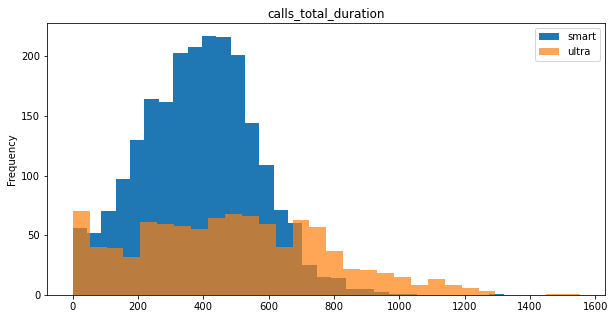

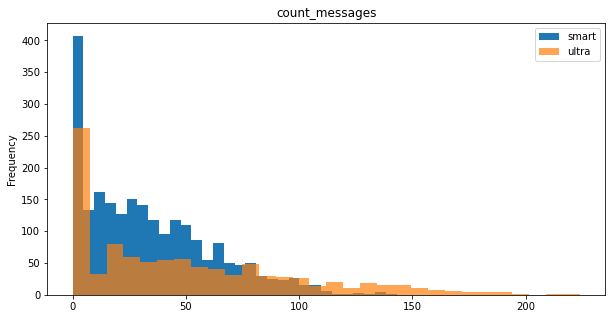

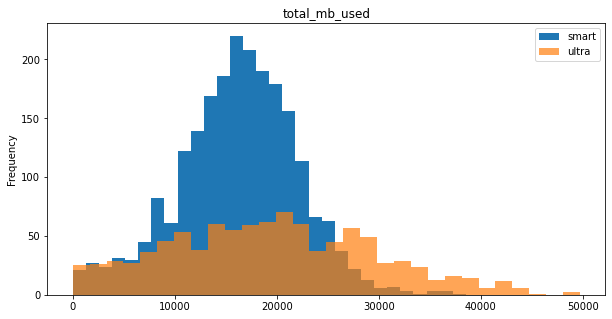

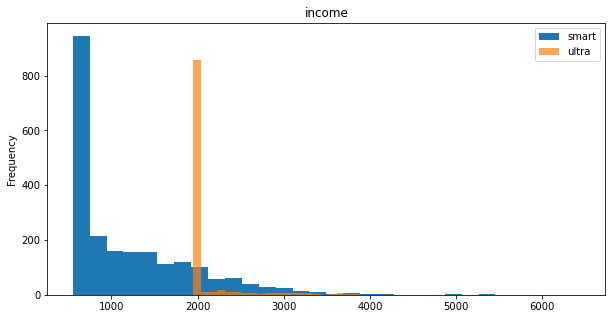

In [20]:
list_of_columns=['calls_total_duration','count_messages','total_mb_used','income']
tariffs = ['ultra','smart']
for column in list_of_columns:
        statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart'][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            label = 'smart', figsize = (10,5)
                                                                           )
        statistic_frame.loc[statistic_frame.loc[:,'tariff'] == "ultra"][column].plot(
                                                                            kind = 'hist',
                                                                            bins = 30,
                                                                            alpha =0.7,
                                                                            label = 'ultra',figsize = (10,5)
                                                                           )
        plt.title(column)
        plt.legend()
        plt.show()

На гистограммах можно заметить что,у тарифа ultra гистограммы скошены вправо, а в тарифе smart гистограммы скошены влево. Это так же подтверждают данные медианы и среднего, приведенные в сводной таблице. Кроме этого можно заметить, что пользователи тарифа ultra не тратят весь базовый пакет минут и количества смс, в отличие от тарифа smart

# Шаг 4. Проверим гипотезы

## Первая гипотеза

- Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.


- Альтернативная гипотеза : средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Проверим нулевую гипотезу:

In [21]:
alpha = 0.05
income_ultra = statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'ultra']['income']
income_smart = statistic_frame.loc[statistic_frame.loc[:,'tariff'] == 'smart']['income']
result = st.ttest_ind(income_smart,income_ultra) 
prob = result.pvalue
print("p-значение:{}".format(prob))
if prob < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось нулевую гипотезу")

p-значение:1.135429611359181e-222
Отвергаем нулевую гипотезу


проверка показала, что мы отвергаем гипотезу о том, что среднее значение дохода абонентов 2 тарифов равны, следовательно подтверждаем альтернативную гипотезу 

## Вторая гипотеза

- Нулевая гипотеза: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов



- Альтернативная гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [22]:
city_moscow = statistic_frame.loc[statistic_frame.loc[:,'city'] == 'Москва']['income']
city_other = statistic_frame.loc[statistic_frame.loc[:,'city'] != 'Москва']['income']
result_city = st.ttest_ind(city_moscow,city_other,equal_var=False) 
prob_city = result_city.pvalue
print("p-значение:{}".format(prob_city))
if prob_city < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.3992250106608254
Не получилось отвергнуть нулевую гипотезу


In [23]:
print('Дисперсия первой совокупности:',np.var(city_moscow))
print('Дисперсия второй совокупности:',np.var(city_other))

Дисперсия первой совокупности: 543047.7299938098
Дисперсия второй совокупности: 614669.7006658289


Вероятность нулевой гипотезы очень велика, поэтому мы не можем ее отбростить и сказать, что вырочка абонентов из Москвы достаточно сильно откличается от пользователей других городов. 

# Шаг 5. Общий вывод

Рекламный бюджет выгоднее всего перераспределить в пользу тарифа ultra, несмотря на то, что его абоненты не покупают дополнительные минуты и смс, в отличие от абонентов тарифа smart. Так же можно заметить, что медианное и среднее значение дохода у абонентов тарифа ultra выше.

В процессе работы, было выявлено, что в целом данные приходят без артефактов и достаточно чистые, за исключением столбца churn_date таблицы users. Я бы предложил при их сборе дополнительно помечать абонентов каким то максимально разумным значением или же условным нулем, чтобы упростить анализ, тем что нет необходимости дополнительно придумывать условные флаги, которые сможет переработать компьютер.К тому же если над подобными данными будут работать несколько сотрудников и каждый из них определит для себя индивидуальный флаг, то в дальнейшем при объединении работ могут появиться баги, которые сложно будет отловить.

Так же исследовав предоставленные данные мы смогли проверить гипотезы. Эти данные помогли нам опровергнуть гипотезу о том, что средняя выручка пользователей разных тарифов равна, а так же с большой вероятностью сказать, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Кроме того, в процессе анализа мы узнали, что в среднем разница медианных и среднеарифметических значений дохода с разных тарифов отличается ~1000 в пользу тарифа ultra 